In [5]:
import os
import glob

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [8]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(263, 20)


In [9]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')
df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [10]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [11]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp7 Individual breakingpoints

In [23]:
# Define the allowed values
allowed_values = [500, 1000, 2000, 3000, 4000, 6000, 10000, 15000]

# Filter the DataFrame
df_7 = df_7[df_7['Requests'].isin(allowed_values)]
print("\nFiltered DataFrame:")


Filtered DataFrame:


In [24]:
df_7.iloc[:,[0,1,2,5,6,10,11,12,-1]].head()

,Latency,Requests,Throughput,Orchestrator,Benchmark,Availability,Horizontal,Vertical,ReqSec
0,7.08,500,14769.0,swarm,sn,0,1,1,491.75
1,4.82,500,14828.0,swarm,mm,0,1,1,493.59
2,4.42,500,14769.0,swarm,mm,0,1,1,491.72
3,4.03,500,14769.0,swarm,mm,0,1,1,491.92
4,7.95,500,14768.0,swarm,hr,0,1,1,491.70


In [25]:
df_7.shape

(120, 20)

In [15]:
labels = df_7['Benchmark'].unique()

In [16]:
df_7

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,N,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
0,7.08,500,14769.0,9849,0,swarm,sn,0,exp7,1,0,1,1,8,512,30,2.644,9.216,1.720,491.75
1,4.82,500,14828.0,9843,0,swarm,mm,0,exp7,3,0,1,1,8,512,30,3.801,7.756,0.345,493.59
2,4.42,500,14769.0,9848,0,swarm,mm,0,exp7,2,0,1,1,8,512,30,3.469,7.912,0.334,491.72
3,4.03,500,14769.0,9850,0,swarm,mm,0,exp7,1,0,1,1,8,512,30,3.030,21.680,0.663,491.92
4,7.95,500,14768.0,9852,0,swarm,hr,0,exp7,1,0,1,1,8,512,30,2.514,10.840,1.720,491.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,15360.00,15000,292759.0,195075,0,swarm,sn,0,exp7,3,0,1,1,8,512,30,5946.676,18612.224,3870.232,9758.64
116,14720.00,15000,293059.0,195523,0,swarm,sn,0,exp7,2,0,1,1,8,512,30,6154.128,18595.840,3580.570,9768.37
117,15500.00,15000,301062.0,198011,0,swarm,sn,0,exp7,1,0,1,1,8,512,30,5622.374,19791.872,4020.661,10035.71
118,22050.00,15000,117081.0,78012,0,swarm,mm,0,exp7,1,0,1,1,8,512,30,14552.412,23265.280,4243.738,3898.60


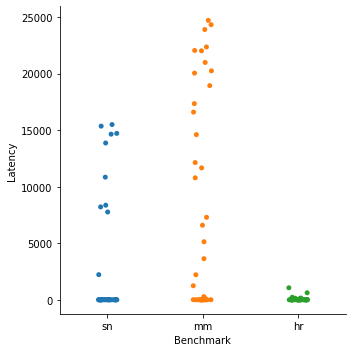

In [20]:
p = sns.catplot(x="Benchmark", y="Latency",data=df_7, order=["sn","mm","hr"])

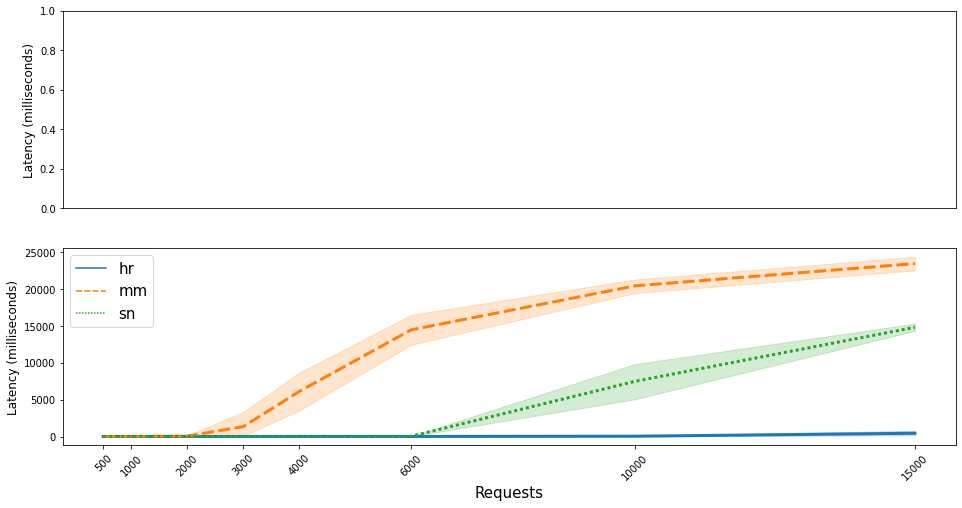

In [21]:
# Exp5
fig, ax = plt.subplots(2, 1, figsize=(16,8))
# fig, ax = plt.subplots(2, 1, figsize=(16,8))
xticks = df_7['Requests'].unique()

plt.subplot(211)
p = sns.lineplot(x="Requests", y="Latency", data=df_5, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
p.set_xticks(xticks)

plt.ylabel('Latency (milliseconds)', fontsize=12)


# Exp7
plt.subplot(212)
p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style='Benchmark', linewidth=3)
p.set_xticks(xticks)
plt.xticks(rotation = 45, fontsize=10)
plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.xlabel('Requests', fontsize=15)


# plt.legend(labels, fontsize=15)
plt.legend(fontsize=15)
plt.show()
# plt.savefig("Figures/exp7-vs-exp5.png", bbox_inches='tight')

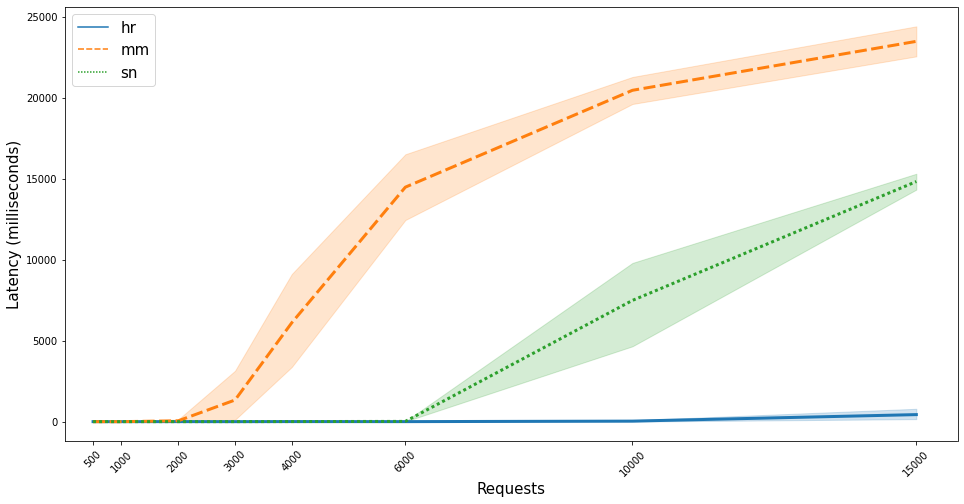

In [26]:
# exp 7
fig, ax = plt.subplots(figsize=(16,8))

p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style="Benchmark", linewidth=3)
xticks = df_7['Requests'].unique()
p.legend(fontsize=15)
p.set_xlabel('Requests', fontsize=15)
p.set_ylabel('Latency (milliseconds)', fontsize=15)
p.set_xticks(xticks)
plt.xticks(rotation = 45, fontsize=10)
plt.xlim(0)
plt.show()
# plt.savefig("Figures/exp7-expanded.png", bbox_inches='tight')

Text(0, 0.5, 'Latency (milliseconds)')

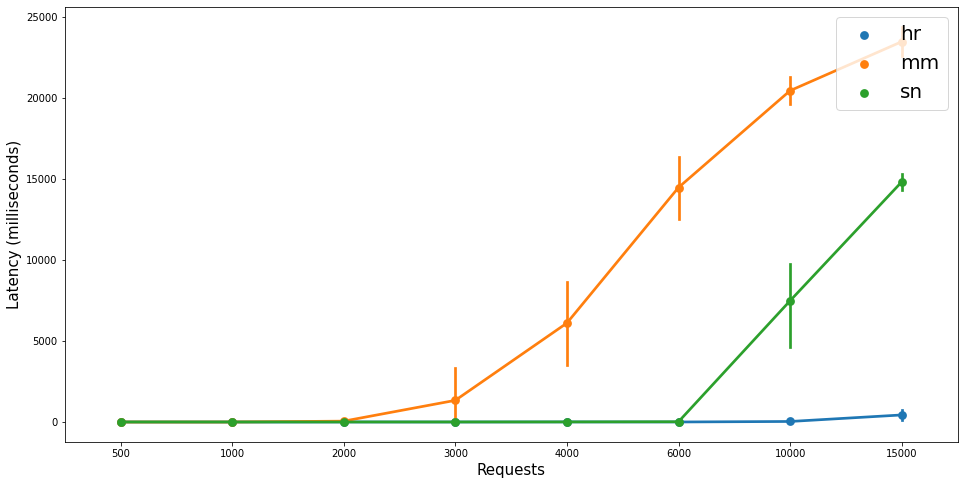

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
# plt.figure(1)
labels = ["sn", "mm", "hr"]

# p = sns.catplot(x="Requests", y="Latency", data=df_6, hue="Benchmark")
p = sns.pointplot(x="Requests", y="Latency", col="Benchmark", data=df_7, hue="Benchmark", style="Benchmark")

p.legend(loc="upper right", fontsize=20)
p.set_xlabel('Requests', fontsize=15)
p.set_ylabel('Latency (milliseconds)', fontsize=15)
# p.axes.get_xticks()
# xticks = [int(tick) for tick in p.axes[0][0].get_xticks()]
# plt.yticks(fontsize=15)
# plt.xticks(xticks, fontsize=15)
# plt.xlim(
# plt.savefig("Figures/exp7.png", bbox_inches='tight')

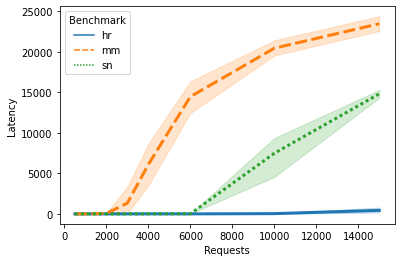

In [19]:
p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style='Benchmark', linewidth=3)